Будем использовать:

np.random.normal(mean, std, size) — генерация случайных данных с нормальным распределением для разных интервалов суток.

np.concatenate([...]) — объединение массивов (утро, день, вечер, ночь) в один массив на 24 часа.

np.sum(arr) — общее количество пассажиров за сутки.

np.mean(arr) — среднее число пассажиров.

np.median(arr) — медиана.

np.argmax(arr) — индекс (час), когда число пассажиров было максимальным.

np.arange(start, stop) — создание массива часов от 0 до 23.

Задача

1. Смоделируйте количество пассажиров, заходящих в автобус каждый час в течение суток (24 часа):

* Утренний час-пик (7–9 ч.): среднее 120 чел/час, σ = 30.

* Дневные часы (10–16 ч.): среднее 60 чел/час, σ = 15.

* Вечерний час-пик (17–20 ч.): среднее 150 чел/час, σ = 40.

* Ночные часы (21–6 ч.): среднее 15 чел/час, σ = 5.

2. Используя NumPy:

* объедините данные в единый массив на 24 элемента,

* найдите час, в который зашло больше всего пассажиров,

* посчитайте среднее и медиану по дню,

* найдите общее число перевезённых пассажиров за сутки.

3. Постройте с помощью Matplotlib:

* линейный график с количеством пассажиров по часам,

* выделите цветом утренний и вечерний пики.

Общее число пассажиров: 1481
Среднее за сутки: 61.7
Медиана за сутки: 56.5
Максимум пассажиров был в 18:00 — 160 человек


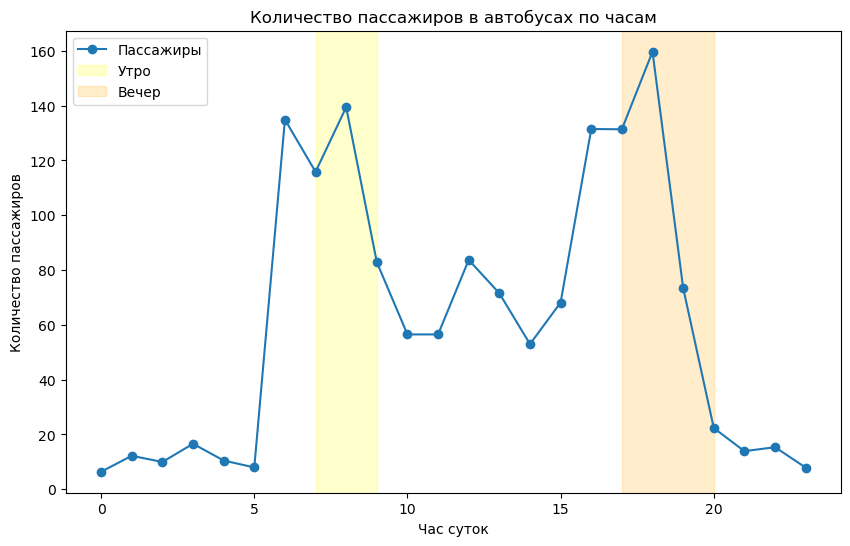

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Фиксируем зерно генератора
np.random.seed(42)

# ---------- СИМУЛЯЦИЯ ----------
# Утро (7–9 ч)
morning = np.random.normal(120, 30, 3)

# День (10–16 ч)
day = np.random.normal(60, 15, 7)

# Вечер (17–20 ч)
evening = np.random.normal(150, 40, 4)

# Ночь (21–6 ч)
night = np.random.normal(15, 5, 10)

# Собираем все часы в один массив (по порядку 0–23)
passengers = np.concatenate([night[:6], morning, day, evening, night[6:]])

# ---------- АНАЛИЗ ----------
print(f"Общее число пассажиров: {passengers.sum():.0f}")
print(f"Среднее за сутки: {np.mean(passengers):.1f}")
print(f"Медиана за сутки: {np.median(passengers):.1f}")

peak_hour = np.argmax(passengers)
print(f"Максимум пассажиров был в {peak_hour}:00 — {passengers[peak_hour]:.0f} человек")

# ---------- ВИЗУАЛИЗАЦИЯ ----------
hours = np.arange(24)  # массив часов от 0 до 23

plt.figure(figsize=(10,6))
plt.plot(hours, passengers, marker="o", label="Пассажиры")

# Выделим утро и вечер
plt.axvspan(7, 9, color="yellow", alpha=0.2, label="Утро")
plt.axvspan(17, 20, color="orange", alpha=0.2, label="Вечер")

plt.title("Количество пассажиров в автобусах по часам")
plt.xlabel("Час суток")
plt.ylabel("Количество пассажиров")
plt.legend()
plt.show()


### Задача

Вы работаете аналитиком в фитнес-клубе. Руководство хочет понять распределение посещений спортзала по дням недели, чтобы оптимизировать расписание тренеров и групповых занятий.

1. Смоделируйте количество посетителей за каждый день недели (7 дней):

* Понедельник–четверг: среднее 200 чел./день, σ = 40.

* Пятница: среднее 150 чел./день, σ = 30.

* Суббота–воскресенье: среднее 300 чел./день, σ = 50.

2. С помощью NumPy:

* объедините данные в единый массив,

* найдите день с максимальным количеством посетителей,

* посчитайте общее число посетителей за неделю, среднее и медиану.

3. Визуализируйте с Matplotlib:

* столбчатую диаграмму (bar plot) посещений по дням,

* выделите цветом выходные дни.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Фиксируем зерно генератора
np.random.seed(42)

# ---------- СИМУЛЯЦИЯ ----------
# Понедельник-четверг
Mon_Th = np.random.normal(200, 40, 4)

# Пятница
Friday = np.random.normal(150, 30, 1)

# Суббота-воскресенье
Weekends = np.random.normal(300, 50, 2)


In [7]:
# Собираем все часы в один массив
visitors = np.concatenate([Mon_Th, Friday, Weekends])

# ---------- АНАЛИЗ ----------
print(f"Общее число посетителей: {visitors.sum():.0f}")
print(f"Среднее за сутки: {np.mean(visitors):.1f}")
print(f"Медиана за сутки: {np.median(visitors):.1f}")

peak_day_index = np.argmax(visitors)
days_of_week = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
print(f"Максимум посетителей был в {days_of_week[peak_day_index]} — {visitors[peak_day_index]:.0f} человек")


Общее число посетителей: 1711
Среднее за сутки: 244.5
Медиана за сутки: 225.9
Максимум посетителей был в воскресенье — 379 человек


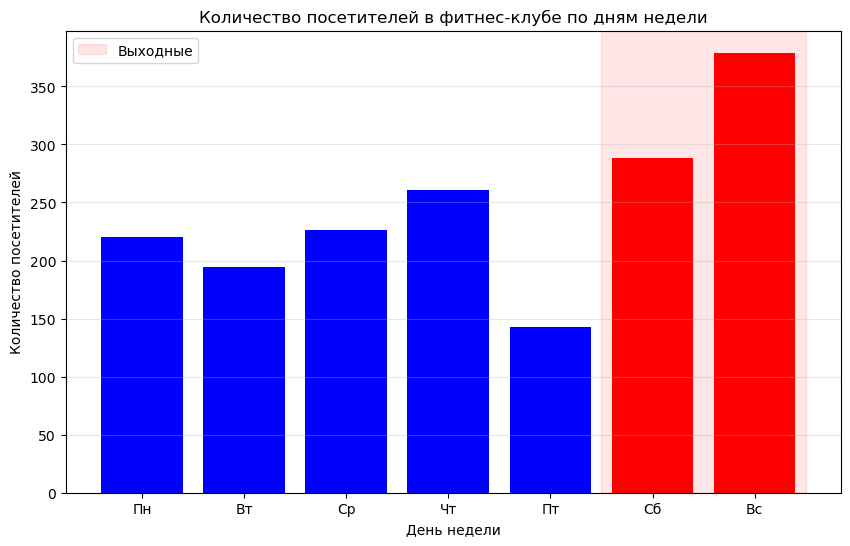

In [8]:
days = np.arange(7)  # массив дней от 0 до 6 (пн-вс)

plt.figure(figsize=(10,6))
plt.bar(days, visitors, color=['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red'])

# Выделим выходные дни
plt.axvspan(4.5, 6.5, color="red", alpha=0.1, label="Выходные")

plt.title("Количество посетителей в фитнес-клубе по дням недели")
plt.xlabel("День недели")
plt.xticks(days, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.ylabel("Количество посетителей")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()